In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import graycomatrix, graycoprops

In [2]:
img_apel = cv2.imread('/kaggle/input/fruits/fruits-360_original-size/fruits-360-original-size/Test/Apple 11/r0_143.jpg')
img_pisang = cv2.imread('/kaggle/input/fruits/fruits-360_original-size/fruits-360-original-size/Test/Banana 3/r0_147.jpg')
img_alpukat = cv2.imread('/kaggle/input/fruits/fruits-360_original-size/fruits-360-original-size/Test/Avocado Green 1/r0_115.jpg')

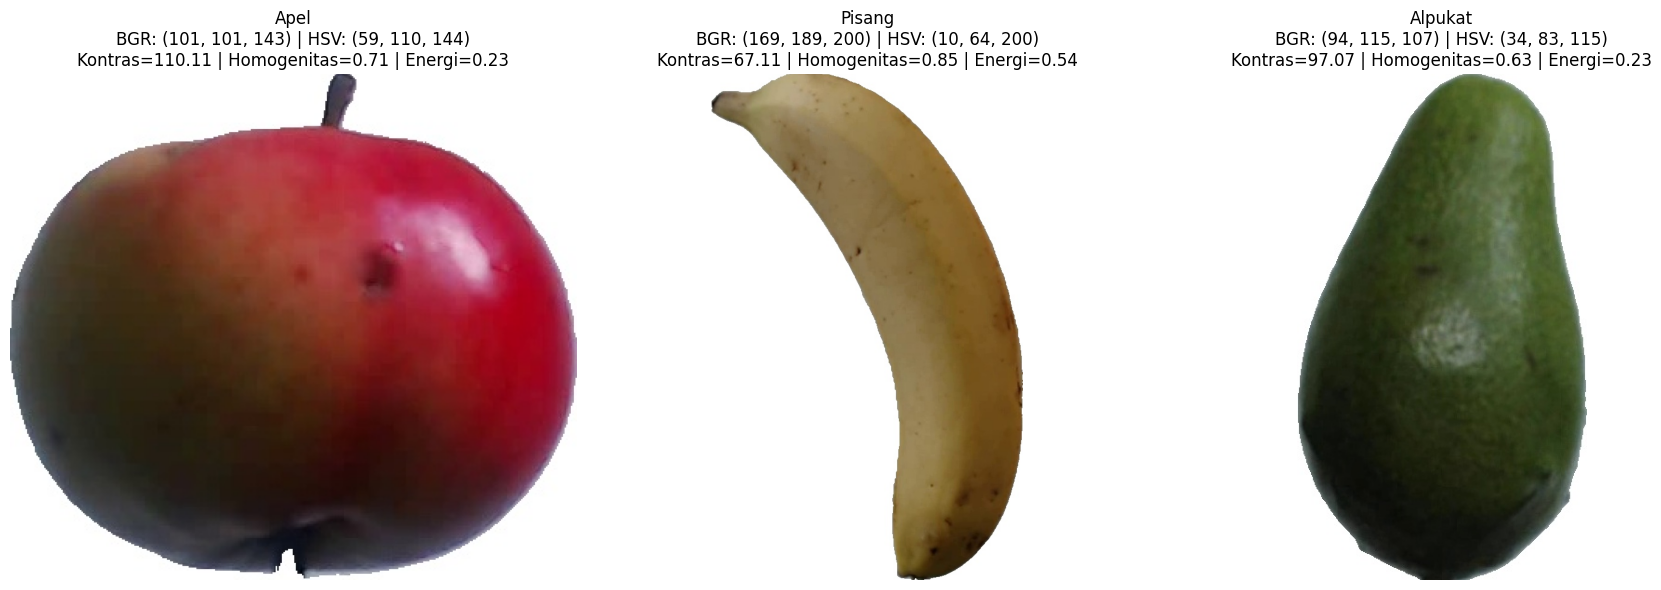

In [3]:
def extract_color_texture(img, title):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    avg_color_per_row = np.average(img, axis=0)
    avg_color = np.average(avg_color_per_row, axis=0)
    avg_color_bgr = tuple(map(int, avg_color))  # (B, G, R)

    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    avg_hsv_row = np.average(img_hsv, axis=0)
    avg_hsv = np.average(avg_hsv_row, axis=0)
    avg_color_hsv = tuple(map(int, avg_hsv))  # (H, S, V)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    plt.imshow(img_rgb)
    plt.title(
        f"{title}\n"
        f"BGR: {avg_color_bgr} | HSV: {avg_color_hsv}\n"
        f"Kontras={contrast:.2f} | Homogenitas={homogeneity:.2f} | Energi={energy:.2f}"
    )
    plt.axis('off')

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
extract_color_texture(img_apel, "Apel")

plt.subplot(1, 3, 2)
extract_color_texture(img_pisang, "Pisang")

plt.subplot(1, 3, 3)
extract_color_texture(img_alpukat, "Alpukat")

plt.tight_layout()
plt.show()
